In [123]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

from scipy.stats import norm as normal
from scipy.stats import multivariate_normal as MVN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [16, 9]
plt.style.use('ggplot')

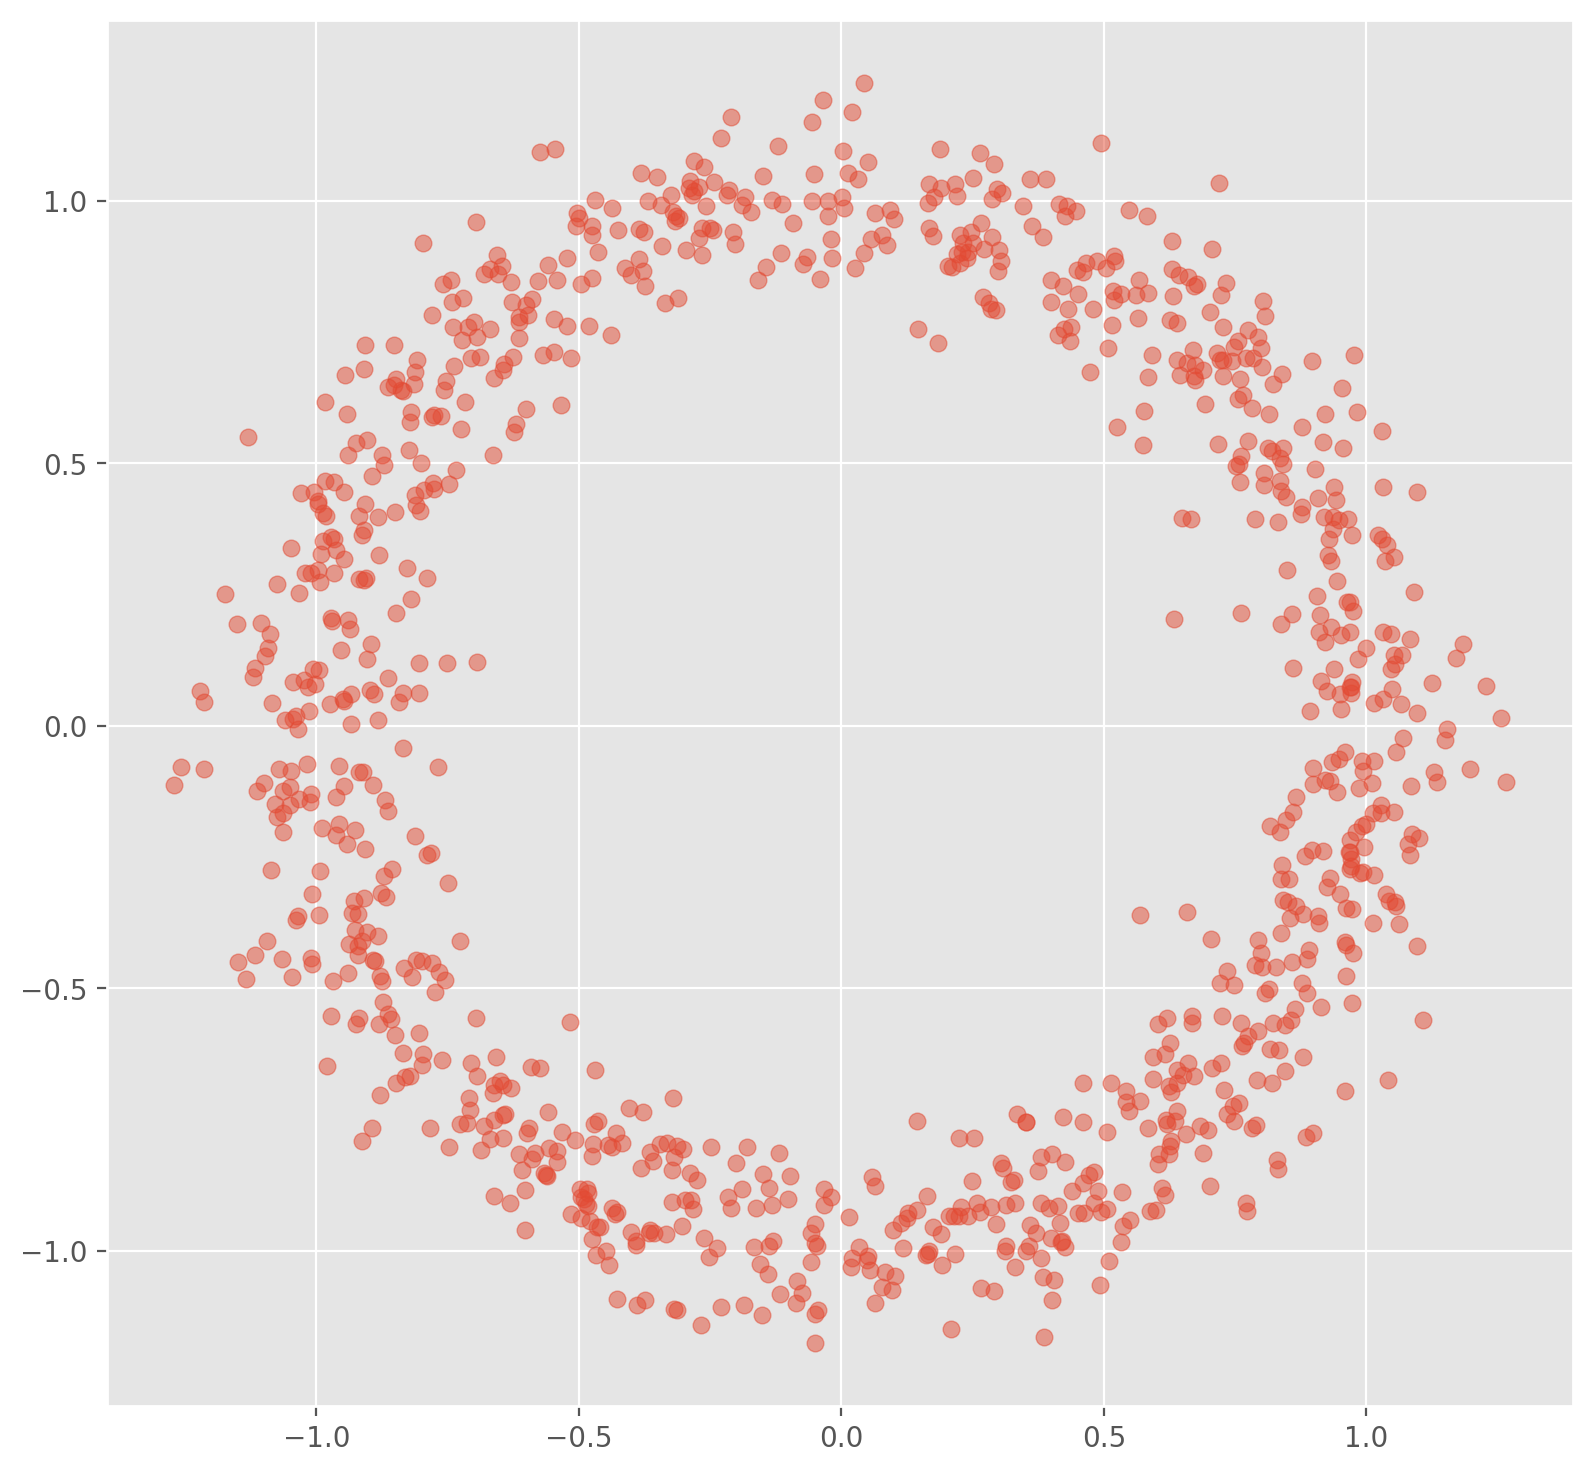

In [124]:
# Artificial data preparation

samples = 1_000
noise = normal.rvs(loc=0, scale=0.1, size=samples)

# Circle
phi = 2 * np.pi * np.random.random(samples)
x = (1 + noise) * np.cos(phi)
y = (1 + noise) * np.sin(phi)

# # Parabola
# x = np.linspace(-1, 1, samples)
# y = x**2 + noise
# x, y = y, x

# # S - shape
# x = np.linspace(1, 3, samples)
# y = (x - 1) * (x - 2) * (x - 3) + noise
# x, y = y, x

X = np.hstack((x.reshape(-1, 1), y.reshape(-1, 1)))
plt.scatter(x, y, alpha=0.5)
plt.axis("scaled")
plt.show()

In [125]:
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)
X_train, X_valid = train_test_split(X_train, test_size=0.1, random_state=42)

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

In [126]:
def kde(X, kernel=normal.pdf, h=0.1):
    from numpy.linalg import norm

    m, n = X.shape
    C = 1 / (m * h**n)
    return lambda x: C * np.sum(kernel(norm(((x - X) / h), axis=1)))

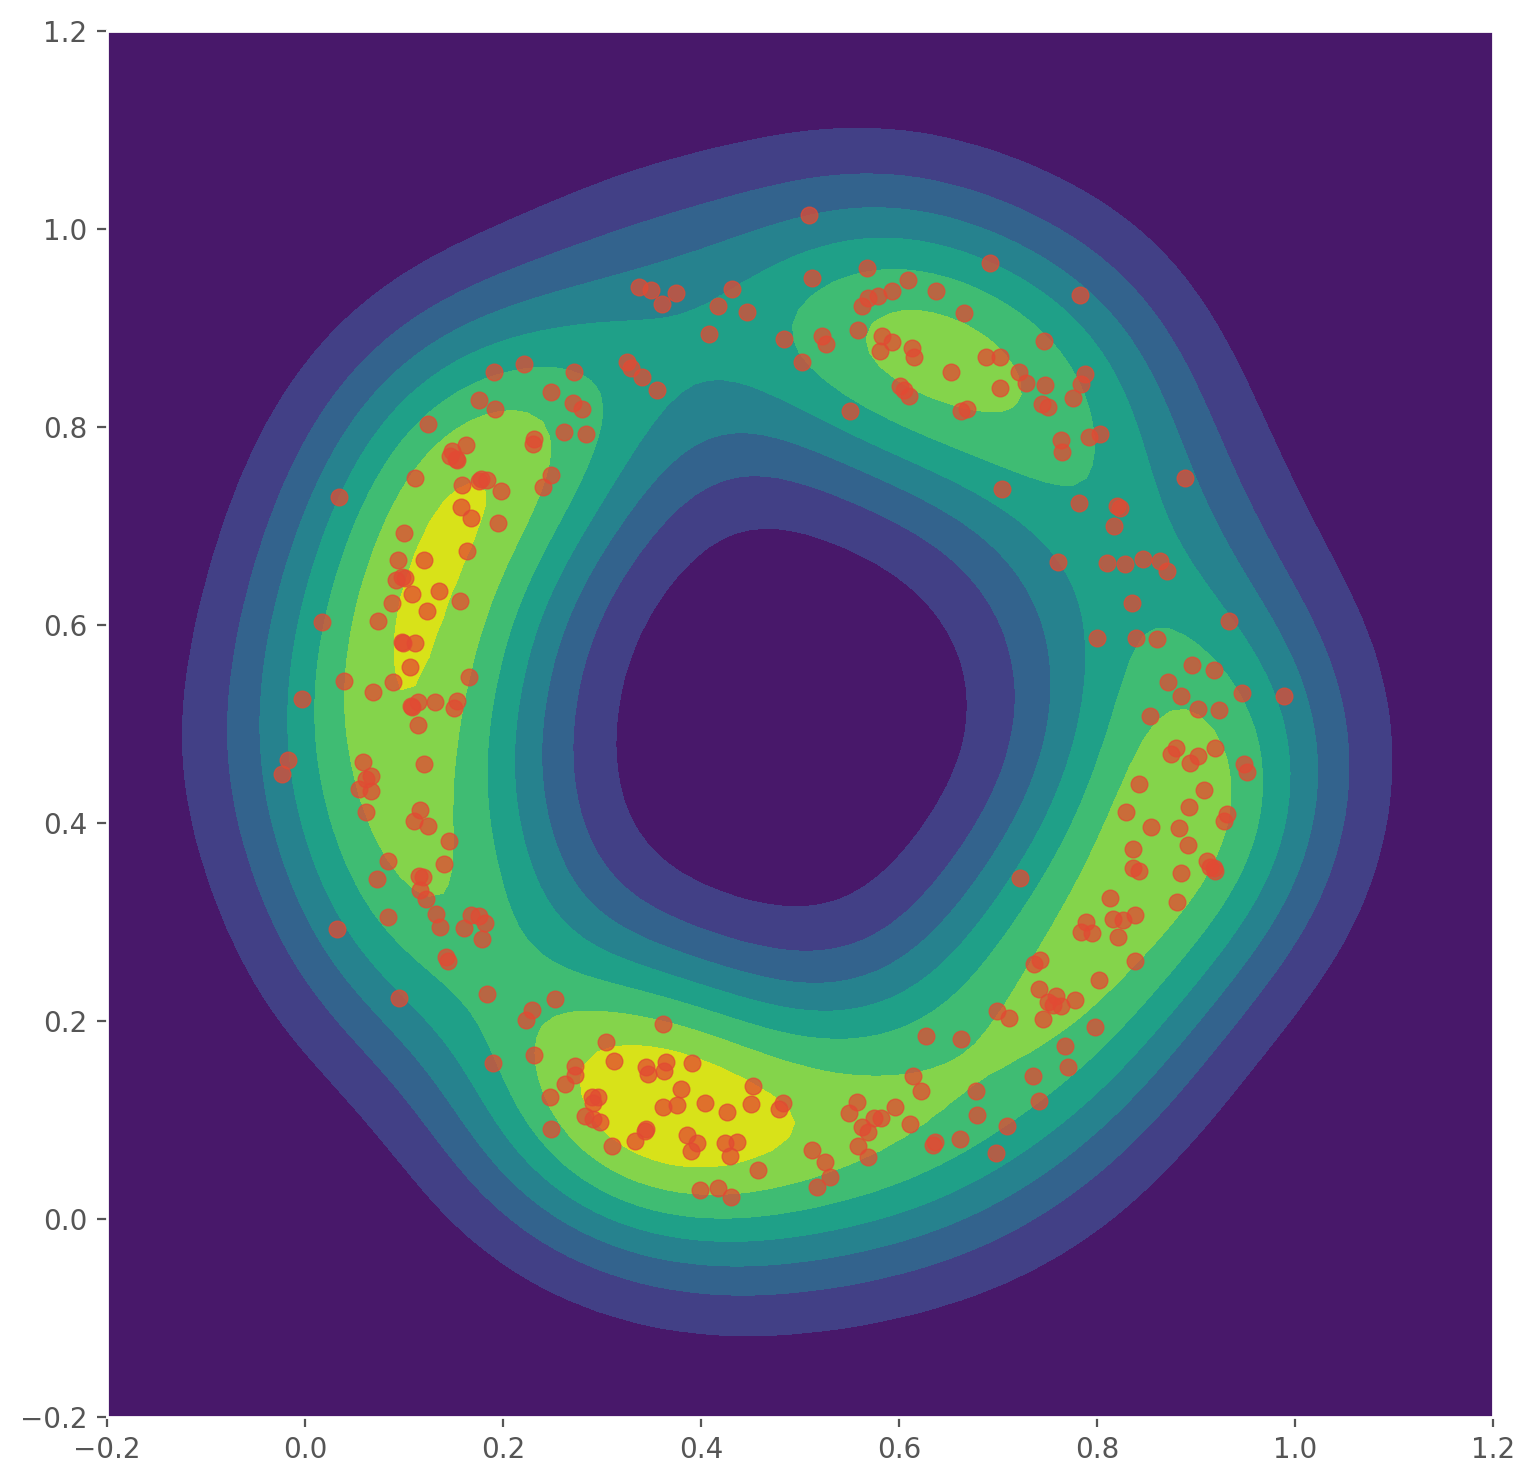

In [127]:
p_hat = kde(X_test, h=0.1)
N = 100
xs = np.linspace(-0.2, 1.2, N)
ys = np.linspace(-0.2, 1.2, N)
zs = np.array([p_hat(np.array([[x, y]])) for x in xs for y in ys])
zs = zs.reshape(N, N).T
plt.contourf(xs, ys, zs)
plt.scatter(X_test[:, 0], X_test[:, 1], alpha=0.75)
plt.axis("scaled")
plt.show()

In [128]:
p_hat(X_train)

ValueError: operands could not be broadcast together with shapes (630,2) (300,2) 